                     ****projet Stroke****


1. Exploratory Data Analysis and vizalisation
1.1 But
1.2 Recuperer les données
1.3 Visualisation
1.4 Commentaire

2. Data Cleaning
2.1 Les nan
2.2 les duplicatats
2.3 Converting Categorical Features

3.  Modeling and evaualtion
3.1 separation du dataframe en features(X) et target (y
3.1 Train Test Split
3.2 Training and Predicting
3.2.1 DecisionTreeClassifier
3.2.2 XGBClassifier                                                      
6.3 Evaluation
6.4 interprétation des résultats

4. Oversampling 1
4.1 Oversampling data_train 
4.2 Training and Predicting
4.2.1 DecisionTreeClassifier
4.2.2 XGBClassifier                                                      
4.3 Evaluation
4.4 interprétation des résultats

5. Oversampling2
5.1 Oversampling data_train & data_test 
5.2 Training and Predicting
5.2.1 DecisionTreeClassifier
5.2.2 XGBClassifier
5.3 Evaluation
5.4 interprétation des résultats

6.  Rééquilibrage des classes avec smote
6.1 Oversampling data_train & data_test 
6.2 Training and Predicting
6.2.1 DecisionTreeClassifier
6.3 Evaluation
6.4 interprétation des résultats  

7. Mise en eprodyction & exporter le model 

**1.Analyse exploratrice des données** 

*1.1BUT*

Le travail consiste à prédire si une personne va subir un AVC
Nous allons essayer de prédire une classification ,la variable target est "stoke".
>stroke=0 : pas d'ataque cardiaque 

>stroke=1 : avc 

*1.2 Recuperer les données*

In [1]:
#importation des librariries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns

In [2]:
# package  machine learning 
#normalisation 
from sklearn.preprocessing import RobustScaler 

#separation du dataset 
from sklearn.model_selection import train_test_split, cross_val_score 

#model 
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier


#metriques 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report 

#pipeline 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

C:\Users\akli_\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
#package special :
# Sur-échantillonnage ou oversampling
from imblearn.over_sampling  import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#smote 
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

#exporter les model 
import joblib

In [4]:
# importation du daset
df = pd.read_csv('https://assets-datascientest.s3-eu-west-1.amazonaws.com/de/total/strokes.csv', index_col = 0)

In [5]:
#aperçu du dataset 
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [6]:
df.tail(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
#dimesnion
df.shape

(5110, 11)

In [8]:
#le type de colonnes 
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

*1.3 Visualisation*

<AxesSubplot:ylabel='id'>

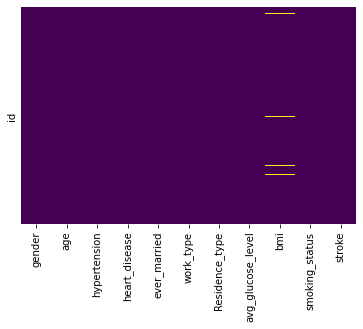

In [9]:
#visualisation des valeurs nulles
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='stroke', ylabel='count'>

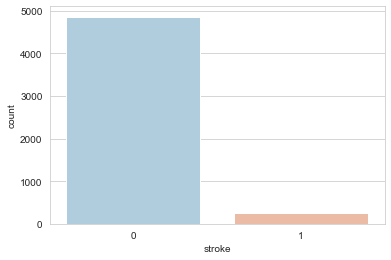

In [10]:
#repartition de la target 
sns.set_style('whitegrid')
sns.countplot(x='stroke',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='stroke', ylabel='count'>

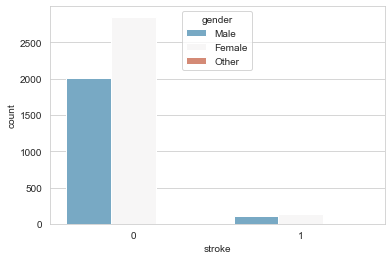

In [11]:
#repartion du genre entre les deux classes 
sns.set_style('whitegrid')
sns.countplot(x='stroke',hue='gender',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='stroke', ylabel='count'>

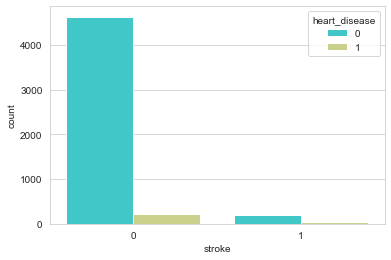

In [12]:
#repartion de la maladie cardiaque  entre les deux classes
sns.set_style('whitegrid')
sns.countplot(x='stroke',hue='heart_disease',data=df,palette='rainbow')

<AxesSubplot:>

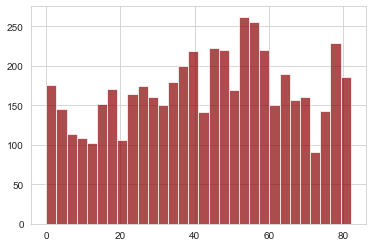

In [13]:
#visualisation de l'age 
df['age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:xlabel='hypertension', ylabel='count'>

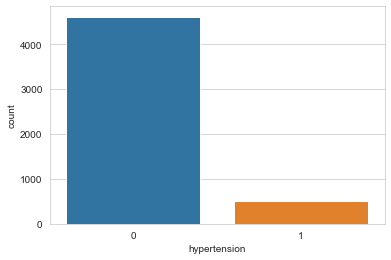

In [14]:
# visualisation d’hypertension
sns.countplot(x='hypertension',data=df)

*1.4commentaire :*

   
-présence des nan dans les colonnes bmi.

-dataset déséquilibré : Le nombre de cas positif (strokes=1) 
                       est trop faible dans le jeu de données.
                       
-la population testée est plutôt en très bonne santé, peu de gens atteint maladie  cardiaque ou soufrant d’hypertension, population jeune, autant de femme que d’homme).

>>risque de surraaprentissage(oversapling)

**2.Data Cleaning**

*2.1.les valeurs nulles nan*

In [15]:
#detection des Nan
df.isna().sum().sort_values(ascending=False)

bmi                  201
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

In [16]:
#on repmlace par la mooyenne 
moyenne=round(df['bmi'].mean(),2)

In [17]:
moyenne

28.89

In [18]:
df["bmi"].fillna(moyenne,inplace=True)

*2.2.les duplicatats*

In [19]:
#detection des doublons
df.duplicated().sum()

0

*2.3.Converting Categorical Features*

In [20]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [21]:
#gender
# On récupère l'index de la ligne gender=other
indexOther = df[df['gender'] == 'Other'].index
# On supprime la ligne du dataFrame
df.drop(indexOther , inplace=True)

# On remplace les modalités 'Male' et 'Female' de la variable 'gender' par 0, 1
df.gender = df.gender.replace(['Male','Female'], [0,1])

In [22]:
#ever_married
#On remplace les modalités 'No' et 'Yes' de la variable 'ever_married' par 0 et 1
df["ever_married"]= df["ever_married"].replace(['No','Yes'], [0,1])

In [23]:
#Residence_type
# On remplace les modalités 'Rural' et 'Urban' de la variable 'Residence_type' par 0 et 1
df.Residence_type = df.Residence_type.replace(['Rural','Urban'], [0,1])

In [24]:
#work_type'
#On supprime la colonne 'work_type'
df = df.drop(['work_type'], axis = 1)

In [25]:
#smoking_status
# On sépare la colonne 'smoking_status' en plusieurs colonnes
df = pd.get_dummies(df, columns=['smoking_status'])

In [26]:
#verfier les modification 
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,
9046,0,67.0,0,1,1,1,228.69,36.60,1,0,1,0,0
51676,1,61.0,0,0,1,0,202.21,28.89,1,0,0,1,0
31112,0,80.0,0,1,1,0,105.92,32.50,1,0,0,1,0


In [27]:
#revoir la nouvelle dimension avec les colonnes crées 
df.shape

(5109, 13)

**3.Modeling and evaualtion**

*3.1separation du dataframe  en features(X) et target (y)*

In [28]:
#separation des variables explicatives dans un dataframe X et la variable cible dans y.
X = df.drop("stroke", axis = 1)
y = df["stroke"]

In [29]:
print(" X",X.shape,"\n","y",y.shape)

 X (5109, 12) 
 y (5109,)


*3.2Train Test Split*

In [30]:
#Separation du dataset en train_set et test_set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
# On affiche les dimensions des datasets après avoir appliqué la fonction 
print(" X_train" ,X_train.shape,"\n" ,"X_test",X_test.shape,"\n","y_train",y_train.shape,"\n","y_test",y_test.shape)

 X_train (3576, 12) 
 X_test (1533, 12) 
 y_train (3576,) 
 y_test (1533,)


*3.2.Training and Predicting*

*3.2.1 DecisionTreeClassifier*

In [32]:
pipeline_dt=make_pipeline(RobustScaler(),DecisionTreeClassifier())

In [33]:
hyperparametres_dt={
"decisiontreeclassifier__max_depth":[150, 155, 160],
"decisiontreeclassifier__min_samples_split":[1, 2, 3],
"decisiontreeclassifier__min_samples_leaf":[1, 2, 3]  
}

In [34]:
machine_dt=GridSearchCV(pipeline_dt,hyperparametres_dt ,cv=10)

In [35]:
#entrainement 
machine_dt.fit(X_train,y_train)

C:\Users\akli_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akli_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akli_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\akli_\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\akli_\anaconda3\lib\site-pack

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__max_depth': [150, 155, 160],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 3],
                         'decisiontreeclassifier__min_samples_split': [1, 2,
                                                                       3]})

In [36]:
machine_dt.best_score_

0.9356822058432313

In [37]:
predictions_dt = machine_dt.predict(X_test)

*3.2.2 XGBClassifier*

In [38]:
pipeline_XG=make_pipeline(RobustScaler(),XGBClassifier())



In [39]:
hyperparametres_XG={
"xgbclassifier__learning_rate" :[0.1],
"xgbclassifier__max_depth" :[10],
"xgbclassifier__min_child_weight" :[5],
"xgbclassifier__n_estimators" :[100], 
"xgbclassifier__subsample" :[0.45]}

In [40]:
machine_XG=GridSearchCV(pipeline_XG,hyperparametres_XG,cv=10)

In [41]:
#entrainement 
machine_XG.fit(X_train,y_train)

C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
           

In [42]:
machine_XG.best_score_

0.9535796441481621

In [43]:
predictions_XG = machine_XG.predict(X_test)

*3.3 Evaluation*

In [44]:
#Mesure de performance classification du model DecisionTreeClassifier 

#matrci de confusion
m=confusion_matrix(y_test,predictions_dt)
print("\nMatrice de Confusion:\n", m) 

#reposrting de classification XGBClassifier
reporting=classification_report(y_test,predictions_dt)
print("\nRapports de classification du modèle DecisionTreeClassifier:\n", reporting)


Matrice de Confusion:
 [[1401   43]
 [  79   10]]

Rapports de classification du modèle DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1444
           1       0.19      0.11      0.14        89

    accuracy                           0.92      1533
   macro avg       0.57      0.54      0.55      1533
weighted avg       0.90      0.92      0.91      1533



In [45]:
#Mesure de performance classification XGBClassifier

#matrci de confusion
m=confusion_matrix(y_test,predictions_XG)
print("\nMatrice de Confusion:\n", m) 

#reposrting de classification 
reporting=classification_report(y_test,predictions_XG)
print("\nRapports de classification du modèle XGBClassifier :\n", reporting)


Matrice de Confusion:
 [[1444    0]
 [  88    1]]

Rapports de classification du modèle XGBClassifier :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       1.00      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.94      0.92      1533



*3.4 Interprétation des résultats*

Les deux model indiquement clairement que la classe 1 n’est pas prédictible du fait de déséquilibre du dataset

Classification déséquilibrée:

Le nombre de cas positif (strokes=1) est trop faible dans le jeu de données. 
Nous allons augmenter le nombre d’observations de la classe minoritaire (oversampling). Nous privilégions le sur-échantillonnage car nous avons seulement quelques milliers de données.

**4.Oversampling**

*4.1 Oversampling data_train*

In [46]:
# Sur-échantillonnage ou oversampling
rOs = RandomOverSampler()
X_rOs_train,y_rOs_train  = rOs.fit_resample(X_train, y_train)

In [47]:
# On affiche les dimensions des datasets après avoir appliqué la fonction 
print(" X_rOs_train" ,X_rOs_train.shape,"\n" ,"X_test",X_test.shape,"\n","y_rOs_train",y_rOs_train.shape,"\n","y_test",y_test.shape)

 X_rOs_train (6832, 12) 
 X_test (1533, 12) 
 y_rOs_train (6832,) 
 y_test (1533,)


avant oversampling  : 

  X_train (3576, 12)   X_test (1533, 12)
  y_train (3576,)      y_test (1533
                           
apres oversampling:

  X_rOs_train(6832, 12)    X_test (1533, 12) 
  y_rOs_train (6832,)       y_test (1533,)                       
                       

Total lignes: 3576
Lignes 1: 3416
Lignes 0: 3416


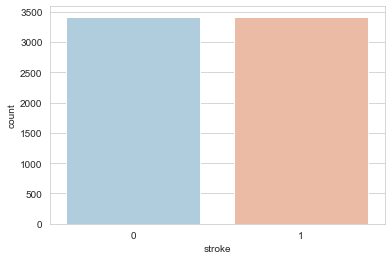

In [48]:
#la nouvelle repartion de la target 
sns.set_style('whitegrid')
sns.countplot(x=y_rOs_train,palette='RdBu_r')
print("Total lignes:",len(y_train))
print("Lignes 1:",len(np.where(y_rOs_train==1)[0]))
print("Lignes 0:",len(np.where(y_rOs_train==0)[0]))

*4.2Training and Predicting*

*4.2.1 DecisionTreeClassifier*

In [49]:
pipeline_dt2=make_pipeline(RobustScaler(),DecisionTreeClassifier())

In [50]:
hyperparametres_dt2={
"decisiontreeclassifier__max_depth":[150, 155, 160],
"decisiontreeclassifier__min_samples_split":[1, 2, 3],
"decisiontreeclassifier__min_samples_leaf":[1, 2, 3]  
                     }

In [51]:
machine_dt2=GridSearchCV(pipeline_dt2,hyperparametres_dt2 ,cv=10)

In [52]:
#entrainement 
machine_dt2.fit(X_rOs_train,y_rOs_train)

C:\Users\akli_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akli_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akli_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\akli_\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\akli_\anaconda3\lib\site-pack

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__max_depth': [150, 155, 160],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 3],
                         'decisiontreeclassifier__min_samples_split': [1, 2,
                                                                       3]})

In [53]:
machine_dt2.best_score_

0.9787780517668011

In [54]:
predictions_dt2 = machine_dt2.predict(X_test)

*4.2.2 XGBClassifier*

In [55]:
pipeline_XG2=make_pipeline(RobustScaler(),XGBClassifier())

In [56]:
hyperparametres_XG2={
"xgbclassifier__learning_rate" :[0.1],
"xgbclassifier__max_depth" :[10],
"xgbclassifier__min_child_weight" :[5],
"xgbclassifier__n_estimators" :[100], 
"xgbclassifier__subsample" :[0.45]}

In [57]:
machine_XG2=GridSearchCV(pipeline_XG2,hyperparametres_XG2,cv=10)

In [58]:
#entrainement 
machine_XG2.fit(X_rOs_train,y_rOs_train)

C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akli_\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
           

In [59]:
machine_XG2.best_score_

0.9607726918565327

In [60]:
predictions_XG2 = machine_XG2.predict(X_test)

*4.3Evaluation*

In [61]:
#Mesure de performance classification DecisionTreeClassifier avec oversampling train 

#matrice de confusion
m=confusion_matrix(y_test,predictions_dt2)
print("\nMatrice de Confusion:\n", m) 

#reporting de classification 
reporting=classification_report(y_test,predictions_dt2)
print("\nRapports de classification du modèle DecisionTreeClassifier :\n", reporting)


Matrice de Confusion:
 [[1380   64]
 [  79   10]]

Rapports de classification du modèle DecisionTreeClassifier :
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1444
           1       0.14      0.11      0.12        89

    accuracy                           0.91      1533
   macro avg       0.54      0.53      0.54      1533
weighted avg       0.90      0.91      0.90      1533



In [62]:
#Mesure de performance classification XGBClassifier avec oversampling train

#matrci de confusion
m=confusion_matrix(y_test,predictions_XG2)
print("\nMatrice de Confusion:\n", m) 

#reposrting de classification 
reporting=classification_report(y_test,predictions_XG2)
print("\nRapports de classification du modèleXGBClassifier  :\n", reporting)


Matrice de Confusion:
 [[1355   89]
 [  62   27]]

Rapports de classification du modèleXGBClassifier  :
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1444
           1       0.23      0.30      0.26        89

    accuracy                           0.90      1533
   macro avg       0.59      0.62      0.61      1533
weighted avg       0.91      0.90      0.91      1533



4.4 interprétation des résultats

 Malgré l’augmentation du nombre d'observation dans la partie train de 3676 a 6832, la prédiction de la classe 1 est toujours faible malgré une pétrie amélioration.

**5.Oversampling2**

*4.1 Oversampling data_train & data_test*

In [63]:
# Sur-échantillonnage ou oversampling
from imblearn.over_sampling  import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
rOs = RandomOverSampler()
X_rOs_test,y_rOs_test  = rOs.fit_resample(X_test, y_test)

In [64]:
# On affiche les dimensions des datasets après avoir appliqué la fonction 
print(" X_rOs_train" ,X_rOs_train.shape,"\n" ,"X_rOs_test",X_rOs_test.shape,"\n","y_rOs_train",y_rOs_train.shape,"\n","y_rOs_test",y_rOs_test.shape)

 X_rOs_train (6832, 12) 
 X_rOs_test (2888, 12) 
 y_rOs_train (6832,) 
 y_rOs_test (2888,)


Lignes 1: 1444
Lignes 0: 1444


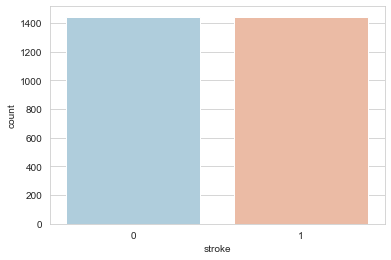

In [65]:
#la nouvelle repartion de la target 
sns.set_style('whitegrid')
sns.countplot(x=y_rOs_test,palette='RdBu_r')
print("Lignes 1:",len(np.where(y_rOs_test==1)[0]))
print("Lignes 0:",len(np.where(y_rOs_test==0)[0]))

*5.2 Training and Predicting*

*5.2.1DecisionTreeClassifier*

In [66]:
pipeline_dt20=make_pipeline(RobustScaler(),DecisionTreeClassifier())

In [67]:
hyperparametres_dt20={
"decisiontreeclassifier__max_depth":[150, 155, 160],
"decisiontreeclassifier__min_samples_split":[1, 2, 3],
"decisiontreeclassifier__min_samples_leaf":[1, 2, 3]  
}

In [68]:
machine_dt20=GridSearchCV(pipeline_dt20,hyperparametres_dt20 ,cv=10)

In [69]:
#entrainement 
machine_dt20.fit(X_rOs_train,y_rOs_train)

C:\Users\akli_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akli_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akli_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\akli_\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\akli_\anaconda3\lib\site-pack

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__max_depth': [150, 155, 160],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 3],
                         'decisiontreeclassifier__min_samples_split': [1, 2,
                                                                       3]})

In [70]:
machine_dt20.best_score_

0.9793632751962875

In [71]:
predictions_dt20 = machine_dt20.predict(X_rOs_test)

*5.2.2 XGBClassifier*

In [72]:
predictions_XG2 = machine_XG2.predict(X_rOs_test)

*5.3 Evaluation*

In [73]:
#Mesure de performance classification DecisionTreeClassifier apres oversampling 2

#matrice de confusion
m=confusion_matrix(y_rOs_test,predictions_dt20)
print("\nMatrice de Confusion:\n", m) 

#reporting de classification 
reporting=classification_report(y_rOs_test,predictions_dt20)
print("\nRapports de classification du modèle DecisionTreeClassifier :\n", reporting)


Matrice de Confusion:
 [[1377   67]
 [1232  212]]

Rapports de classification du modèle DecisionTreeClassifier :
               precision    recall  f1-score   support

           0       0.53      0.95      0.68      1444
           1       0.76      0.15      0.25      1444

    accuracy                           0.55      2888
   macro avg       0.64      0.55      0.46      2888
weighted avg       0.64      0.55      0.46      2888



In [74]:
#Mesure de performance classification XGBClassifier apres oversampling 2

#matrci de confusion
m=confusion_matrix(y_rOs_test,predictions_XG2)
print("\nMatrice de Confusion:\n", m) 

#reposrting de classification 
reporting=classification_report(y_rOs_test,predictions_XG2)
print("\nRapports de classification du modèle  XGBClassifier:\n", reporting)


Matrice de Confusion:
 [[1355   89]
 [1014  430]]

Rapports de classification du modèle  XGBClassifier:
               precision    recall  f1-score   support

           0       0.57      0.94      0.71      1444
           1       0.83      0.30      0.44      1444

    accuracy                           0.62      2888
   macro avg       0.70      0.62      0.57      2888
weighted avg       0.70      0.62      0.57      2888



*5.4 interprétation des résultats*

meme avec un oversdampling des deux pârtie , a savoir train_set et test_set ,
les resulats de la prediction de la classe 1 reste insufisant; 
le meilluer reuslats obtrenu est 0.43

**6. Rééquilibrage des classes avec smote** 

In [75]:
#rééquilibrage des classes avec SMOTE
sm = SMOTE(sampling_strategy='minority')
#train-set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
#test_set
X_test_smote, y_test_smote = sm.fit_resample(X_test, y_test)

In [76]:
# On affiche les dimensions des datasets après avoir appliqué la fonction 
print(" X_train_smote" ,X_train_smote.shape,"\n" ,"X_test_smote",X_test_smote.shape,"\n","y_train_smote",y_train_smote.shape,"\n","y_test_smote",y_test_smote.shape)

 X_train_smote (6832, 12) 
 X_test_smote (2888, 12) 
 y_train_smote (6832,) 
 y_test_smote (2888,)


Lignes 1: 3416
Lignes 0: 3416


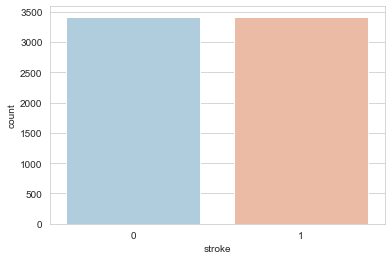

In [77]:
#la nouvelle repartion de la target 
sns.set_style('whitegrid')
sns.countplot(x=y_train_smote,palette='RdBu_r')
print("Lignes 1:",len(np.where(y_train_smote==1)[0]))
print("Lignes 0:",len(np.where(y_train_smote==0)[0]))

Lignes 1: 1444
Lignes 0: 1444


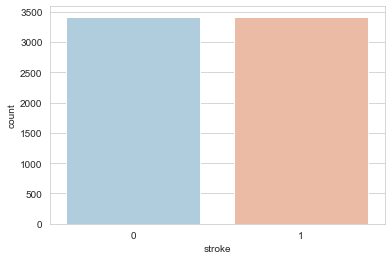

In [78]:
#la nouvelle repartion de la target 
sns.set_style('whitegrid')
sns.countplot(x=y_train_smote,palette='RdBu_r')
print("Lignes 1:",len(np.where(y_test_smote==1)[0]))
print("Lignes 0:",len(np.where(y_test_smote==0)[0]))

*6.2 Training and Predicting*

In [79]:
pipeline=make_pipeline(RobustScaler(),RandomForestClassifier())

In [80]:
hyperparametres={
"randomforestclassifier__n_estimators":[10, 50, 100],
"randomforestclassifier__criterion":['gini','entropy'],
"randomforestclassifier__min_samples_split":[1, 2, 3]  
}

In [81]:
machine=GridSearchCV(pipeline,hyperparametres,cv=10)

In [82]:
#entrainement 
machine.fit(X_train_smote,y_train_smote)

C:\Users\akli_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akli_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akli_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\akli_\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 442, in fit
    trees = Parallel(
  File "C:\Users\akli_\anaconda3\lib\s

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__min_samples_split': [1, 2, 3],
                         'randomforestclassifier__n_estimators': [10, 50, 100]})

In [83]:
machine.best_params_

{'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__min_samples_split': 3,
 'randomforestclassifier__n_estimators': 100}

In [84]:
machine.best_score_

0.9686948276009695

In [85]:
predictions = machine.predict(X_test_smote)

*6.3 Evaluation*

In [86]:
#Mesure de performance classification DecisionTreeClassifier

#matrci de confusion
m=confusion_matrix(y_test_smote,predictions)
print("\nMatrice de Confusion:\n", m) 

#reposrting de classification 
reporting=classification_report(y_test_smote,predictions)
print("\nRapports de classification du modèle DecisionTreeClassifier :\n", reporting)


Matrice de Confusion:
 [[1417   27]
 [ 402 1042]]

Rapports de classification du modèle DecisionTreeClassifier :
               precision    recall  f1-score   support

           0       0.78      0.98      0.87      1444
           1       0.97      0.72      0.83      1444

    accuracy                           0.85      2888
   macro avg       0.88      0.85      0.85      2888
weighted avg       0.88      0.85      0.85      2888



*6.4 interprétation des résultats* 

In [87]:
#bingo 
#meilleurs resulats en faisant smote sur l'ensemble  du dataframe (train_set et test_set) avec randomforestclassifier

**7. mise en eprodyction & exporter le model**

In [88]:
pipeline_finale=make_pipeline(RobustScaler(),
                              RandomForestClassifier( criterion='gini',
                                                      min_samples_split= 2,
                                                      n_estimators= 50)
                             )

In [89]:
pipeline_finale.fit(X_train_smote,y_train_smote)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=50))])

In [90]:
prediction_finale =pipeline_finale.predict(X_test_smote)

In [91]:
print("\nRapports de classification du modèle rf :\n",classification_report(y_test_smote,prediction_finale))


Rapports de classification du modèle rf :
               precision    recall  f1-score   support

           0       0.77      0.98      0.86      1444
           1       0.97      0.71      0.82      1444

    accuracy                           0.84      2888
   macro avg       0.87      0.84      0.84      2888
weighted avg       0.87      0.84      0.84      2888



In [92]:
#exporter le model 

In [93]:
joblib.dump(pipeline_finale,"stroke.final")

['stroke.final']